# Randomized Layer Experiments

In these experiments, explanations for images output from the same model with randomized weights at different layers are compared for similarity using scikit-learn's SSIM. This is for sanity check #2. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
from PIL import Image

from skimage.measure import compare_ssim as ssim
import os
from glob import glob
import matplotlib.pyplot as plt

In [2]:
path_dict = {}

Get paths to all images

In [3]:
for i in range(7):
    path_dict[i] = glob('Explanations_TEST_Scramble_{}/*.png'.format(i),recursive=True)

In [4]:
path_dict

{0: ['Explanations_TEST_Scramble_0\\id_13_Grad.png',
  'Explanations_TEST_Scramble_0\\id_13_SHAP.png',
  'Explanations_TEST_Scramble_0\\id_17_Grad.png',
  'Explanations_TEST_Scramble_0\\id_17_SHAP.png',
  'Explanations_TEST_Scramble_0\\id_18_Grad.png',
  'Explanations_TEST_Scramble_0\\id_18_SHAP.png',
  'Explanations_TEST_Scramble_0\\id_1_Grad.png',
  'Explanations_TEST_Scramble_0\\id_1_SHAP.png',
  'Explanations_TEST_Scramble_0\\id_200_Grad.png',
  'Explanations_TEST_Scramble_0\\id_200_SHAP.png',
  'Explanations_TEST_Scramble_0\\id_204_Grad.png',
  'Explanations_TEST_Scramble_0\\id_204_SHAP.png',
  'Explanations_TEST_Scramble_0\\id_210_Grad.png',
  'Explanations_TEST_Scramble_0\\id_210_SHAP.png',
  'Explanations_TEST_Scramble_0\\id_212_Grad.png',
  'Explanations_TEST_Scramble_0\\id_212_SHAP.png',
  'Explanations_TEST_Scramble_0\\id_217_Grad.png',
  'Explanations_TEST_Scramble_0\\id_217_SHAP.png',
  'Explanations_TEST_Scramble_0\\id_219_Grad.png',
  'Explanations_TEST_Scramble_0\\id_21

In [5]:
path_frame = pd.DataFrame.from_dict(path_dict)
path_frame

,0,1,2,3,4,5,6
0,Explanations_TEST_Scramble_0\id_13_Grad.png,Explanations_TEST_Scramble_1\id_13_Grad.png,Explanations_TEST_Scramble_2\id_13_Grad.png,Explanations_TEST_Scramble_3\id_13_Grad.png,Explanations_TEST_Scramble_4\id_13_Grad.png,Explanations_TEST_Scramble_5\id_13_Grad.png,Explanations_TEST_Scramble_6\id_13_Grad.png
1,Explanations_TEST_Scramble_0\id_13_SHAP.png,Explanations_TEST_Scramble_1\id_13_SHAP.png,Explanations_TEST_Scramble_2\id_13_SHAP.png,Explanations_TEST_Scramble_3\id_13_SHAP.png,Explanations_TEST_Scramble_4\id_13_SHAP.png,Explanations_TEST_Scramble_5\id_13_SHAP.png,Explanations_TEST_Scramble_6\id_13_SHAP.png
2,Explanations_TEST_Scramble_0\id_17_Grad.png,Explanations_TEST_Scramble_1\id_17_Grad.png,Explanations_TEST_Scramble_2\id_17_Grad.png,Explanations_TEST_Scramble_3\id_17_Grad.png,Explanations_TEST_Scramble_4\id_17_Grad.png,Explanations_TEST_Scramble_5\id_17_Grad.png,Explanations_TEST_Scramble_6\id_17_Grad.png
3,Explanations_TEST_Scramble_0\id_17_SHAP.png,Explanations_TEST_Scramble_1\id_17_SHAP.png,Explanations_TEST_Scramble_2\id_17_SHAP.png,Explanations_TEST_Scramble_3\id_17_SHAP.png,Explanations_TEST_Scramble_4\id_17_SHAP.png,Explanations_TEST_Scramble_5\id_17_SHAP.png,Explanations_TEST_Scramble_6\id_17_SHAP.png
4,Explanations_TEST_Scramble_0\id_18_Grad.png,Explanations_TEST_Scramble_1\id_18_Grad.png,Explanations_TEST_Scramble_2\id_18_Grad.png,Explanations_TEST_Scramble_3\id_18_Grad.png,Explanations_TEST_Scramble_4\id_18_Grad.png,Explanations_TEST_Scramble_5\id_18_Grad.png,Explanations_TEST_Scramble_6\id_18_Grad.png
5,Explanations_TEST_Scramble_0\id_18_SHAP.png,Explanations_TEST_Scramble_1\id_18_SHAP.png,Explanations_TEST_Scramble_2\id_18_SHAP.png,Explanations_TEST_Scramble_3\id_18_SHAP.png,Explanations_TEST_Scramble_4\id_18_SHAP.png,Explanations_TEST_Scramble_5\id_18_SHAP.png,Explanations_TEST_Scramble_6\id_18_SHAP.png
6,Explanations_TEST_Scramble_0\id_1_Grad.png,Explanations_TEST_Scramble_1\id_1_Grad.png,Explanations_TEST_Scramble_2\id_1_Grad.png,Explanations_TEST_Scramble_3\id_1_Grad.png,Explanations_TEST_Scramble_4\id_1_Grad.png,Explanations_TEST_Scramble_5\id_1_Grad.png,Explanations_TEST_Scramble_6\id_1_Grad.png
7,Explanations_TEST_Scramble_0\id_1_SHAP.png,Explanations_TEST_Scramble_1\id_1_SHAP.png,Explanations_TEST_Scramble_2\id_1_SHAP.png,Explanations_TEST_Scramble_3\id_1_SHAP.png,Explanations_TEST_Scramble_4\id_1_SHAP.png,Explanations_TEST_Scramble_5\id_1_SHAP.png,Explanations_TEST_Scramble_6\id_1_SHAP.png
8,Explanations_TEST_Scramble_0\id_200_Grad.png,Explanations_TEST_Scramble_1\id_200_Grad.png,Explanations_TEST_Scramble_2\id_200_Grad.png,Explanations_TEST_Scramble_3\id_200_Grad.png,Explanations_TEST_Scramble_4\id_200_Grad.png,Explanations_TEST_Scramble_5\id_200_Grad.png,Explanations_TEST_Scramble_6\id_200_Grad.png
9,Explanations_TEST_Scramble_0\id_200_SHAP.png,Explanations_TEST_Scramble_1\id_200_SHAP.png,Explanations_TEST_Scramble_2\id_200_SHAP.png,Explanations_TEST_Scramble_3\id_200_SHAP.png,Explanations_TEST_Scramble_4\id_200_SHAP.png,Explanations_TEST_Scramble_5\id_200_SHAP.png,Explanations_TEST_Scramble_6\id_200_SHAP.png


Load all images, add images to dataframe

In [6]:
for i in path_dict.keys():
    image_list = []
    path_list = path_frame[i].tolist()
    for j in path_list:
        image_list.append(np.asarray(Image.open(j)))
    path_frame['Folder_{}_image'.format(i)] = image_list
    

Add placeholder rows for SSIM, we will compare the SSIM of the unscrambled model to the progressively scrabled models 

In [7]:
for a in range(7):
    path_frame['SSIM_0_to_{}'.format(a)] = np.nan

SSIM of the same image should be one

In [8]:
ssim(path_frame['Folder_0_image'][0], path_frame['Folder_0_image'][0], win_size = 3)

1.0

Calcualte all SSIM's between all models for all images 

In [9]:
for i in path_frame.index:
    for j in range(7):
        path_frame['SSIM_0_to_{}'.format(j)][i] = ssim(path_frame['Folder_0_image'][i], path_frame['Folder_{}_image'.format(j)][i],
                                                       win_size=9, multichannel = True, use_sample_covariance = True)

C:\Users\s4435302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
path_frame.head()

,0,1,2,3,4,5,6,Folder_0_image,Folder_1_image,Folder_2_image,...,Folder_4_image,Folder_5_image,Folder_6_image,SSIM_0_to_0,SSIM_0_to_1,SSIM_0_to_2,SSIM_0_to_3,SSIM_0_to_4,SSIM_0_to_5,SSIM_0_to_6
0,Explanations_TEST_Scramble_0\id_13_Grad.png,Explanations_TEST_Scramble_1\id_13_Grad.png,Explanations_TEST_Scramble_2\id_13_Grad.png,Explanations_TEST_Scramble_3\id_13_Grad.png,Explanations_TEST_Scramble_4\id_13_Grad.png,Explanations_TEST_Scramble_5\id_13_Grad.png,Explanations_TEST_Scramble_6\id_13_Grad.png,"[[[0, 0, 90, 255], [0, 0, 90, 255], [0, 0, 90,...","[[[0, 0, 121, 255], [0, 0, 121, 255], [0, 0, 1...","[[[0, 0, 87, 255], [0, 0, 87, 255], [0, 0, 87,...",...,"[[[0, 0, 90, 255], [0, 0, 90, 255], [0, 0, 90,...","[[[0, 0, 96, 255], [0, 0, 96, 255], [0, 0, 96,...","[[[0, 0, 63, 255], [0, 0, 63, 255], [0, 0, 63,...",1.0,0.849241,0.782700,0.819582,0.800707,0.832277,0.858033
1,Explanations_TEST_Scramble_0\id_13_SHAP.png,Explanations_TEST_Scramble_1\id_13_SHAP.png,Explanations_TEST_Scramble_2\id_13_SHAP.png,Explanations_TEST_Scramble_3\id_13_SHAP.png,Explanations_TEST_Scramble_4\id_13_SHAP.png,Explanations_TEST_Scramble_5\id_13_SHAP.png,Explanations_TEST_Scramble_6\id_13_SHAP.png,"[[[51, 51, 51, 255], [51, 51, 51, 255], [51, 5...","[[[50, 51, 51, 255], [50, 51, 51, 255], [50, 5...","[[[51, 51, 51, 255], [51, 51, 51, 255], [51, 5...",...,"[[[41, 100, 65, 255], [41, 100, 65, 255], [41,...","[[[51, 51, 51, 255], [51, 51, 51, 255], [51, 5...","[[[119, 46, 63, 255], [119, 46, 63, 255], [119...",1.0,0.922888,0.906655,0.894149,0.848100,0.773830,0.834527
2,Explanations_TEST_Scramble_0\id_17_Grad.png,Explanations_TEST_Scramble_1\id_17_Grad.png,Explanations_TEST_Scramble_2\id_17_Grad.png,Explanations_TEST_Scramble_3\id_17_Grad.png,Explanations_TEST_Scramble_4\id_17_Grad.png,Explanations_TEST_Scramble_5\id_17_Grad.png,Explanations_TEST_Scramble_6\id_17_Grad.png,"[[[243, 182, 71, 255], [244, 183, 72, 255], [2...","[[[116, 72, 173, 255], [117, 73, 174, 255], [1...","[[[116, 72, 135, 255], [117, 73, 136, 255], [1...",...,"[[[116, 72, 168, 255], [117, 73, 169, 255], [1...","[[[116, 72, 152, 255], [117, 73, 153, 255], [1...","[[[116, 72, 135, 255], [117, 73, 136, 255], [1...",1.0,0.698003,0.754720,0.754720,0.730621,0.697222,0.754720
3,Explanations_TEST_Scramble_0\id_17_SHAP.png,Explanations_TEST_Scramble_1\id_17_SHAP.png,Explanations_TEST_Scramble_2\id_17_SHAP.png,Explanations_TEST_Scramble_3\id_17_SHAP.png,Explanations_TEST_Scramble_4\id_17_SHAP.png,Explanations_TEST_Scramble_5\id_17_SHAP.png,Explanations_TEST_Scramble_6\id_17_SHAP.png,"[[[236, 166, 165, 255], [238, 168, 167, 255], ...","[[[236, 166, 165, 255], [238, 168, 167, 255], ...","[[[237, 138, 148, 255], [239, 140, 149, 255], ...",...,"[[[236, 166, 165, 255], [238, 168, 167, 255], ...","[[[236, 166, 165, 255], [238, 168, 167, 255], ...","[[[236, 166, 165, 255], [238, 168, 167, 255], ...",1.0,0.806414,0.767320,0.869688,0.823309,0.832481,0.792287
4,Explanations_TEST_Scramble_0\id_18_Grad.png,Explanations_TEST_Scramble_1\id_18_Grad.png,Explanations_TEST_Scramble_2\id_18_Grad.png,Explanations_TEST_Scramble_3\id_18_Grad.png,Explanations_TEST_Scramble_4\id_18_Grad.png,Explanations_TEST_Scramble_5\id_18_Grad.png,Explanations_TEST_Scramble_6\id_18_Grad.png,"[[[111, 100, 173, 255], [110, 101, 173, 255], ...","[[[111, 100, 173, 255], [110, 101, 173, 255], ...","[[[111, 100, 207, 255], [110, 101, 207, 255], ...",...,"[[[111, 100, 173, 255], [110, 101, 173, 255], ...","[[[111, 100, 205, 255], [110, 101, 205, 255], ...","[[[111, 100, 173, 255], [110, 101, 173, 255], ...",1.0,0.714673,0.690788,0.714673,0.714673,0.722169,0.714673


In [11]:
# update dataframe with a column of the explanation type
path_frame['SHAP or GradCAM'] = [
    'Grad' if 'Grad.png' in path_frame.iloc[i][0] else 'Shap' for i in path_frame.index
]

# parse image id from the filename
path_frame['ID'] = [
    os.path.split(i)[1].split('_')[1] for i in path_frame[0]
]

# drop all unneeded columns
path_frame = path_frame.drop(list(range(7)) + ['Folder_{}_image'.format(i) for i in range(7)], axis=1)

In [12]:
path_frame.head()

,SSIM_0_to_0,SSIM_0_to_1,SSIM_0_to_2,SSIM_0_to_3,SSIM_0_to_4,SSIM_0_to_5,SSIM_0_to_6,SHAP or GradCAM,ID
0,1.0,0.849241,0.782700,0.819582,0.800707,0.832277,0.858033,Grad,13
1,1.0,0.922888,0.906655,0.894149,0.848100,0.773830,0.834527,Shap,13
2,1.0,0.698003,0.754720,0.754720,0.730621,0.697222,0.754720,Grad,17
3,1.0,0.806414,0.767320,0.869688,0.823309,0.832481,0.792287,Shap,17
4,1.0,0.714673,0.690788,0.714673,0.714673,0.722169,0.714673,Grad,18


In [13]:
df = path_frame
df_shap = df['SHAP or GradCAM'] == 'Shap'
df_shap = df[df_shap]
df_shap = df_shap.drop('SHAP or GradCAM', axis = 1)
df_shap

,SSIM_0_to_0,SSIM_0_to_1,SSIM_0_to_2,SSIM_0_to_3,SSIM_0_to_4,SSIM_0_to_5,SSIM_0_to_6,ID
1,1.0,0.922888,0.906655,0.894149,0.848100,0.773830,0.834527,13
3,1.0,0.806414,0.767320,0.869688,0.823309,0.832481,0.792287,17
5,1.0,0.797553,0.860525,0.886549,0.888341,0.748408,0.762806,18
7,1.0,0.824167,0.830112,0.820510,0.844349,0.778337,0.795571,1
9,1.0,0.759046,0.752421,0.688203,0.774357,0.704919,0.762903,200
11,1.0,0.833615,0.841504,0.869035,0.852696,0.760411,0.847626,204
13,1.0,0.798300,0.781698,0.901498,0.802505,0.798174,0.852507,210
15,1.0,0.814263,0.797725,0.791468,0.785543,0.745987,0.769320,212
17,1.0,0.813466,0.831863,0.838167,0.769857,0.705767,0.812643,217
19,1.0,0.781135,0.803999,0.801282,0.812203,0.661588,0.761367,219


In [14]:
df_grad = df['SHAP or GradCAM'] == 'Grad'
df_grad = df[df_grad]
df_grad = df_grad.drop('SHAP or GradCAM', axis = 1)
df_grad

,SSIM_0_to_0,SSIM_0_to_1,SSIM_0_to_2,SSIM_0_to_3,SSIM_0_to_4,SSIM_0_to_5,SSIM_0_to_6,ID
0,1.0,0.849241,0.782700,0.819582,0.800707,0.832277,0.858033,13
2,1.0,0.698003,0.754720,0.754720,0.730621,0.697222,0.754720,17
4,1.0,0.714673,0.690788,0.714673,0.714673,0.722169,0.714673,18
6,1.0,0.846136,0.815334,0.799672,0.791062,0.792832,0.820284,1
8,1.0,0.759265,0.735402,0.753038,0.774440,0.757351,0.784049,200
10,1.0,0.912590,0.854191,0.798963,0.807672,0.885631,0.885631,204
12,1.0,0.745555,0.672616,0.706870,0.662399,0.743054,0.783642,210
14,1.0,0.750260,0.706285,0.760330,0.761749,0.752362,0.780472,212
16,1.0,0.680165,0.763481,0.692485,0.712932,0.799377,0.799377,217
18,1.0,0.741335,0.711845,0.748703,0.704881,0.760958,0.785852,219


Save data and descriptions

In [15]:
df_shap.to_csv('shap_random_layers.csv')

In [16]:
df_grad.to_csv('grad_random_layers.csv')

In [17]:
shap_describe = df_shap.describe()

In [18]:
grad_describe = df_grad.describe()

In [19]:
shap_describe.to_csv('shap_random_layers_stats.csv')

In [20]:
grad_describe.to_csv('grad_random_layers_stats.csv')

Describe and plot all shap data

In [21]:
shap_describe

,SSIM_0_to_0,SSIM_0_to_1,SSIM_0_to_2,SSIM_0_to_3,SSIM_0_to_4,SSIM_0_to_5,SSIM_0_to_6
count,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1.0,0.827302,0.837339,0.843184,0.832104,0.763120,0.823783
std,0.0,0.047772,0.049271,0.064100,0.044728,0.049780,0.051191
min,1.0,0.759046,0.752421,0.688203,0.769857,0.661588,0.761367
25%,1.0,0.797361,0.802430,0.807605,0.796969,0.738931,0.786545
50%,1.0,0.813865,0.833666,0.853601,0.831149,0.759719,0.823585
75%,1.0,0.845653,0.868012,0.895987,0.857280,0.799969,0.853065
max,1.0,0.922888,0.919521,0.918183,0.910188,0.841819,0.945350


In [22]:
shap_describe.loc['mean']

SSIM_0_to_0    1.000000
SSIM_0_to_1    0.827302
SSIM_0_to_2    0.837339
SSIM_0_to_3    0.843184
SSIM_0_to_4    0.832104
SSIM_0_to_5    0.763120
SSIM_0_to_6    0.823783
Name: mean, dtype: float64

In [23]:
shap_dict = {}
shap_dict['SSIM'] = shap_describe.loc['mean']
shap_dict['Layers Scrambled'] = [0,1,2,3,4,5,6]

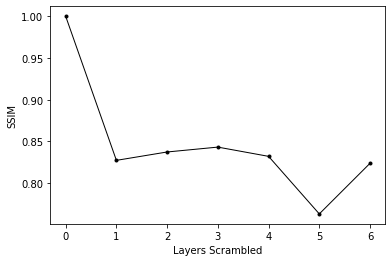

In [24]:
plt.xlabel('Layers Scrambled')
plt.ylabel('SSIM')
plt.title('')
plt.plot('Layers Scrambled', 'SSIM', data = shap_dict, color = 'black', lw = 1, marker = '.')


Describe and plot all GradCAM data

In [25]:
grad_describe

,SSIM_0_to_0,SSIM_0_to_1,SSIM_0_to_2,SSIM_0_to_3,SSIM_0_to_4,SSIM_0_to_5,SSIM_0_to_6
count,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1.0,0.768003,0.759907,0.764453,0.756007,0.769209,0.806998
std,0.0,0.062794,0.059642,0.046964,0.054045,0.047804,0.042617
min,1.0,0.680165,0.650900,0.677707,0.659294,0.697222,0.714673
25%,1.0,0.722018,0.710455,0.740196,0.714238,0.742539,0.783948
50%,1.0,0.749627,0.773090,0.773816,0.768094,0.760469,0.802959
75%,1.0,0.803221,0.802329,0.795522,0.793473,0.794468,0.831565
max,1.0,0.912590,0.854191,0.840392,0.840392,0.885631,0.885631


In [26]:
grad_dict = {}
grad_dict['SSIM'] = grad_describe.loc['mean']
grad_dict['Layers Scrambled'] = [0,1,2,3,4,5,6]

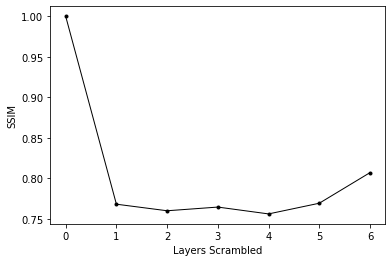

In [27]:
plt.xlabel('Layers Scrambled')
plt.ylabel('SSIM')
plt.title('')
plt.plot('Layers Scrambled', 'SSIM', data = grad_dict, color = 'black', lw = 1, marker = '.')


### Change to SSIM difference 

We now calcualte statistics on the differences of SSIM's, from scrabled layers 0 to 1, 1 to 2, etc.

In [28]:
diff_shap = df.loc[df['SHAP or GradCAM'] == 'Shap']
diff_grad = df.loc[df['SHAP or GradCAM'] == 'Grad']

In [29]:
diff_shap['Diff_0_to_1'] = abs(diff_shap['SSIM_0_to_0'] - diff_shap['SSIM_0_to_1'])
diff_shap['Diff_1_to_2'] = abs(diff_shap['SSIM_0_to_1'] - diff_shap['SSIM_0_to_2'])
diff_shap['Diff_2_to_3'] = abs(diff_shap['SSIM_0_to_2'] - diff_shap['SSIM_0_to_3'])
diff_shap['Diff_3_to_4'] = abs(diff_shap['SSIM_0_to_3'] - diff_shap['SSIM_0_to_4'])
diff_shap['Diff_4_to_5'] = abs(diff_shap['SSIM_0_to_4'] - diff_shap['SSIM_0_to_5'])
diff_shap['Diff_5_to_6'] = abs(diff_shap['SSIM_0_to_5'] - diff_shap['SSIM_0_to_6'])

C:\Users\s4435302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\s4435302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\s4435302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [30]:
diff_shap.head()

,SSIM_0_to_0,SSIM_0_to_1,SSIM_0_to_2,SSIM_0_to_3,SSIM_0_to_4,SSIM_0_to_5,SSIM_0_to_6,SHAP or GradCAM,ID,Diff_0_to_1,Diff_1_to_2,Diff_2_to_3,Diff_3_to_4,Diff_4_to_5,Diff_5_to_6
1,1.0,0.922888,0.906655,0.894149,0.848100,0.773830,0.834527,Shap,13,0.077112,0.016232,0.012506,0.046049,0.074271,0.060698
3,1.0,0.806414,0.767320,0.869688,0.823309,0.832481,0.792287,Shap,17,0.193586,0.039095,0.102369,0.046379,0.009171,0.040194
5,1.0,0.797553,0.860525,0.886549,0.888341,0.748408,0.762806,Shap,18,0.202447,0.062973,0.026024,0.001791,0.139933,0.014398
7,1.0,0.824167,0.830112,0.820510,0.844349,0.778337,0.795571,Shap,1,0.175833,0.005945,0.009602,0.023839,0.066012,0.017234
9,1.0,0.759046,0.752421,0.688203,0.774357,0.704919,0.762903,Shap,200,0.240954,0.006625,0.064218,0.086154,0.069438,0.057985


In [31]:
diff_shap = diff_shap[['Diff_0_to_1','Diff_1_to_2','Diff_2_to_3','Diff_3_to_4','Diff_4_to_5','Diff_5_to_6']]

In [32]:
diff_shap.describe()

,Diff_0_to_1,Diff_1_to_2,Diff_2_to_3,Diff_3_to_4,Diff_4_to_5,Diff_5_to_6
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.172698,0.032065,0.045801,0.033357,0.070131,0.065687
std,0.047772,0.030062,0.044721,0.029418,0.045016,0.035767
min,0.077112,0.005945,0.001337,0.001791,0.004331,0.014398
25%,0.154347,0.014615,0.008778,0.012510,0.038076,0.037665
50%,0.186135,0.018736,0.026777,0.021023,0.067725,0.059341
75%,0.202639,0.044836,0.070300,0.046131,0.091031,0.092370
max,0.240954,0.098759,0.137766,0.098993,0.150615,0.125775


The same for GradCAM

In [33]:
diff_grad['Diff_0_to_1'] = abs(diff_grad['SSIM_0_to_0'] - diff_grad['SSIM_0_to_1'])
diff_grad['Diff_1_to_2'] = abs(diff_grad['SSIM_0_to_1'] - diff_grad['SSIM_0_to_2'])
diff_grad['Diff_2_to_3'] = abs(diff_grad['SSIM_0_to_2'] - diff_grad['SSIM_0_to_3'])
diff_grad['Diff_3_to_4'] = abs(diff_grad['SSIM_0_to_3'] - diff_grad['SSIM_0_to_4'])
diff_grad['Diff_4_to_5'] = abs(diff_grad['SSIM_0_to_4'] - diff_grad['SSIM_0_to_5'])
diff_grad['Diff_5_to_6'] = abs(diff_grad['SSIM_0_to_5'] - diff_grad['SSIM_0_to_6'])

C:\Users\s4435302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\s4435302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\s4435302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [34]:
diff_grad = diff_grad[['Diff_0_to_1','Diff_1_to_2','Diff_2_to_3','Diff_3_to_4','Diff_4_to_5','Diff_5_to_6']]

In [35]:
diff_grad.describe()

,Diff_0_to_1,Diff_1_to_2,Diff_2_to_3,Diff_3_to_4,Diff_4_to_5,Diff_5_to_6
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.231997,0.044070,0.029953,0.018158,0.042750,0.038726
std,0.062794,0.027233,0.019384,0.014488,0.030371,0.031798
min,0.087410,0.003873,0.000000,0.000000,0.001770,0.000000
25%,0.196779,0.023880,0.015157,0.008467,0.017615,0.025541
50%,0.250373,0.050346,0.030527,0.018644,0.032484,0.027781
75%,0.277982,0.064063,0.037909,0.024504,0.076976,0.053941
max,0.319835,0.083316,0.070996,0.044471,0.086445,0.112546


In [36]:
diff_grad.describe().to_csv('random_layer_differences_grad.csv')
diff_grad.describe().to_csv('random_layer_differences_shap.csv')